In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
n_rounds = 10;

# Helper function to read input data
def read_input(s):
    df = pd.read_csv(s, header=None, names=['execution_time'])
    return df\
    .mask(df['execution_time'] > df['execution_time'].quantile(0.975), axis=0)

In [3]:
df_hotcall_warm_20171117 = read_input("./data/20171117/hotcall/hotcall_warm")
df_hotcall_cold_20171117 = read_input("./data/20171117/hotcall/hotcall_cold_2")
df_vanilla_warm_20171117 = read_input("./data/20171117/vanilla/vanilla_warm")
df_vanilla_cold_20171117 = read_input("./data/20171117/vanilla/vanilla_cold_2")

df_hotcall_warm_20180312 = read_input("./data/20180312/hotcall/hotcall_warm")
df_hotcall_cold_20180312 = read_input("./data/20180312/hotcall/hotcall_cold_2")
df_vanilla_warm_20180312 = read_input("./data/20180312/vanilla/vanilla_warm")
df_vanilla_cold_20180312 = read_input("./data/20180312/vanilla/vanilla_cold_2")

df_hotcall_warm_20180807 = read_input("./data/20180807/hotcall/hotcall_warm")
df_hotcall_cold_20180807 = read_input("./data/20180807/hotcall/hotcall_cold_2")
df_vanilla_warm_20180807 = read_input("./data/20180807/vanilla/vanilla_warm")
df_vanilla_cold_20180807 = read_input("./data/20180807/vanilla/vanilla_cold_2")

df_hotcall_warm_20190312 = read_input("./data/2019/hotcall/hotcall_warm")
df_hotcall_cold_20190312 = read_input("./data/2019/hotcall/hotcall_cold_2")
df_vanilla_warm_20190312 = read_input("./data/2019/vanilla/vanilla_warm")
df_vanilla_cold_20190312 = read_input("./data/2019/vanilla/vanilla_cold_2")

df_medians = pd.DataFrame({
    'hotcall_warm': [
        df_hotcall_warm_20171117.median()[0], 
        df_hotcall_warm_20180312.median()[0], 
        df_hotcall_warm_20180807.median()[0], 
        df_hotcall_warm_20190312.median()[0]
    ],
    'hotcall_cold': [
        df_hotcall_cold_20171117.median()[0], 
        df_hotcall_cold_20180312.median()[0], 
        df_hotcall_cold_20180807.median()[0], 
        df_hotcall_cold_20190312.median()[0]
    ],
    'ecall_warm': [
        df_vanilla_warm_20171117.median()[0], 
        df_vanilla_warm_20180312.median()[0],
        df_vanilla_warm_20180807.median()[0],
        df_vanilla_warm_20190312.median()[0]
    ],
    'ecall_cold': [
        df_vanilla_cold_20171117.median()[0], 
        df_vanilla_cold_20180312.median()[0],
        df_vanilla_cold_20180807.median()[0],
        df_vanilla_cold_20190312.median()[0]
    ]
})
idx = pd.Series(['171117', '180312', '180807', '190312'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Enclave transition time for hotcalls and ecalls with cold and hot cache.')

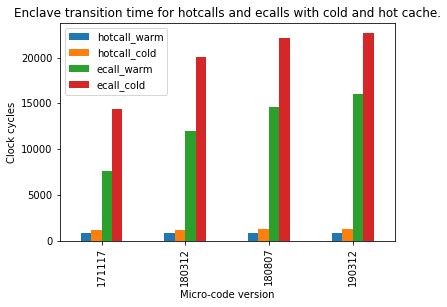

In [4]:
df_medians[['hotcall_warm', 'hotcall_cold', 'ecall_warm', 'ecall_cold']].plot.bar()
plt.xlabel("Micro-code version")
plt.ylabel("Clock cycles")
plt.title("Enclave transition time for hotcalls and ecalls with cold and hot cache.")

We can observer that the cost of an ecall has been roughly doubled when using the latest intel micro code in comparision to if we use micro code from before the first speculation based attacks were discovered and patched.

### Enclave transition time.

How much time does it take to make a enclave transition with hcalls vs ecalls (warm/cold cache)? 


We meassure the transition time for our hotcall implementation by meassuring the time it takes for the application to execute a single blocking hotcall. However, since we only want to meassure the transition time in this experiment, the function call is actually not executed by the enclave but simply ignored and discarded. The reason for not executing the hotcall is that in order for the enclave to execute the hotcall, it needs to access a shared memory structure which adds a signficant amount of execution time since this structure is not in the cache (it has been invalidated when written to by the application thread when preparing the enclave). 


We meassure the traisntion time for an ecall by calling a ecall which takes no arguments, return no value and has an empty function body. The only way of entering the enclave when not using hotcalls is using ecalls, it's therefore not possible to enter the enclave without actually executing a function. 


Numbers published in hotcall papers are prio spectre and foreshadow (and possibly others). Intel has afterwards released secruity patches which makes the lowers the performance of enclave transitions.

In [5]:
df_hotcall_cold = df_hotcall_cold_20190312
df_hotcall_cold.median()

execution_time    1210.0
dtype: float64

Text(0.5,1,'Execution time distribution for hotcall function which takes no arguments.')

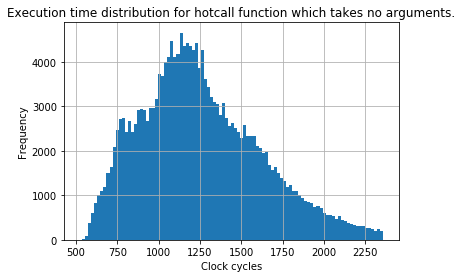

In [6]:
df_hotcall_cold.hist(bins=100, grid=True);
plt.xlabel('Clock cycles')
plt.ylabel('Frequency')
plt.title('Execution time distribution for hotcall function which takes no arguments.')

In [7]:
df_hotcall_0_warm = df_hotcall_warm_20190312
df_hotcall_0_warm.median()

execution_time    789.0
dtype: float64

Text(0.5,1,'Execution time distribution for hotcall function which takes no arguments.')

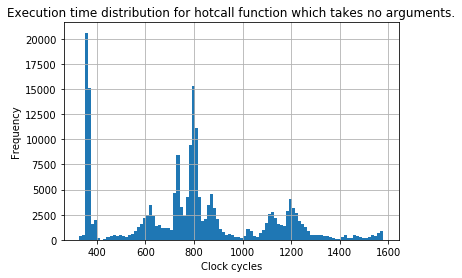

In [8]:
df_hotcall_0_warm.hist(bins=100, grid=True);
plt.xlabel('Clock cycles')
plt.ylabel('Frequency')
plt.title('Execution time distribution for hotcall function which takes no arguments.')

What kind of distribution? Multi modal?

In [9]:
df_vanilla_0_cold = df_vanilla_cold_20190312

Text(0.5,1,'Execution time distribution for vanilla SGX function which takes no arguments.')

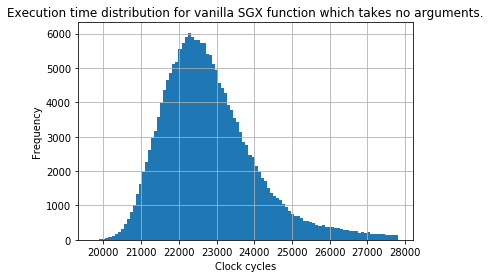

In [10]:
df_vanilla_0_cold.hist(bins=100);
plt.xlabel('Clock cycles')
plt.ylabel('Frequency')
plt.title('Execution time distribution for vanilla SGX function which takes no arguments.')

In [11]:
df_vanilla_0_warm = df_vanilla_warm_20190312

Text(0.5,1,'Execution time distribution for vanilla SGX function which takes no arguments.')

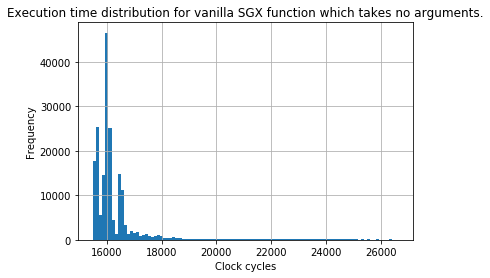

In [12]:
df_vanilla_0_warm.hist(bins=100);
plt.xlabel('Clock cycles')
plt.ylabel('Frequency')
plt.title('Execution time distribution for vanilla SGX function which takes no arguments.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90d480c310>]],
      dtype=object)

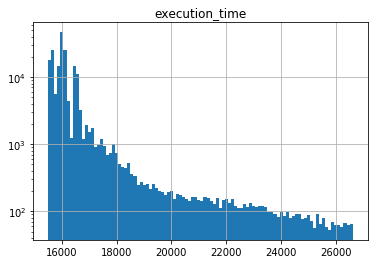

In [13]:
df_vanilla_0_warm.hist(bins=100, log=True)

It appears that warm ecalls follow a power law distributuin.

In [25]:
df_hotcall_0_warm = read_input("./data/hotcall_parameter/hotcall_0/hotcall_0_warm")
df_hotcall_1_warm = read_input("./data/hotcall_parameter/hotcall_1/hotcall_1_warm")
df_hotcall_3_warm = read_input("./data/hotcall_parameter/hotcall_3/hotcall_3_warm")
df_hotcall_5_warm = read_input("./data/hotcall_parameter/hotcall_5/hotcall_5_warm")
df_hotcall_10_warm = read_input("./data/hotcall_parameter/hotcall_10/hotcall_10_warm")
df_hotcall_15_warm = read_input("./data/hotcall_parameter/hotcall_15/hotcall_15_warm")

df_hotcall_0_cold = read_input("./data/hotcall_parameter/hotcall_0/hotcall_0_cold_2")
df_hotcall_1_cold = read_input("./data/hotcall_parameter/hotcall_1/hotcall_1_cold_2")
df_hotcall_3_cold = read_input("./data/hotcall_parameter/hotcall_3/hotcall_3_cold_2")
df_hotcall_5_cold = read_input("./data/hotcall_parameter/hotcall_5/hotcall_5_cold_2")
df_hotcall_10_cold = read_input("./data/hotcall_parameter/hotcall_10/hotcall_10_cold_2")
df_hotcall_15_cold = read_input("./data/hotcall_parameter/hotcall_15/hotcall_15_cold_2")

In [26]:
df_vanilla_0_warm = read_input("./data/hotcall_parameter/vanilla_0/vanilla_0_warm")
df_vanilla_1_warm = read_input("./data/hotcall_parameter/vanilla_1/vanilla_1_warm")
df_vanilla_3_warm = read_input("./data/hotcall_parameter/vanilla_3/vanilla_3_warm")
df_vanilla_5_warm = read_input("./data/hotcall_parameter/vanilla_5/vanilla_5_warm")
df_vanilla_10_warm = read_input("./data/hotcall_parameter/vanilla_10/vanilla_10_warm")
df_vanilla_15_warm = read_input("./data/hotcall_parameter/vanilla_15/vanilla_15_warm")

df_vanilla_0_cold = read_input("./data/hotcall_parameter/vanilla_0/vanilla_0_cold_2")
df_vanilla_1_cold = read_input("./data/hotcall_parameter/vanilla_1/vanilla_1_cold_2")
df_vanilla_3_cold = read_input("./data/hotcall_parameter/vanilla_3/vanilla_3_cold_2")
df_vanilla_5_cold = read_input("./data/hotcall_parameter/vanilla_5/vanilla_5_cold_2")
df_vanilla_10_cold = read_input("./data/hotcall_parameter/vanilla_10/vanilla_10_cold_2")
df_vanilla_15_cold = read_input("./data/hotcall_parameter/vanilla_15/vanilla_15_cold_2")

In [27]:
df_medians = pd.DataFrame({
    'hotcall_warm': [df_hotcall_0_warm.median()[0], 
                df_hotcall_1_warm.median()[0], 
                df_hotcall_3_warm.median()[0], 
                df_hotcall_5_warm.median()[0], 
                df_hotcall_10_warm.median()[0],
                df_hotcall_15_warm.median()[0],
               ],
    'hotcall_cold': [df_hotcall_0_cold.median()[0], 
                    df_hotcall_1_cold.median()[0], 
                    df_hotcall_3_cold.median()[0], 
                    df_hotcall_5_cold.median()[0], 
                    df_hotcall_10_cold.median()[0],
                    df_hotcall_15_cold.median()[0],
                   ],
    'ecall_warm': [df_vanilla_0_warm.median()[0], 
                df_vanilla_1_warm.median()[0],
                df_vanilla_3_warm.median()[0],
                df_vanilla_5_warm.median()[0],
                df_vanilla_10_warm.median()[0],
                df_vanilla_15_warm.median()[0]
               ],
     'ecall_cold': [df_vanilla_0_cold.median()[0], 
                df_vanilla_1_cold.median()[0],
                df_vanilla_3_cold.median()[0],
                df_vanilla_5_cold.median()[0],
                df_vanilla_10_cold.median()[0],
                df_vanilla_15_cold.median()[0]
               ]
})
idx = pd.Series([0, 1, 3, 5, 10, 15])
df_medians = df_medians.set_index(idx)
df_medians.head()

,ecall_cold,ecall_warm,hotcall_cold,hotcall_warm
0,23259.0,16019.0,2163.0,1005.0
1,23106.0,16092.0,2330.0,1045.0
3,23489.0,16128.0,2332.0,1089.0
5,23384.0,16148.0,2576.0,1160.0
10,23443.0,16138.0,2871.0,1341.0


Text(0.5,1,'Execution times for hotcalls and ecalls with different number of function parameters.')

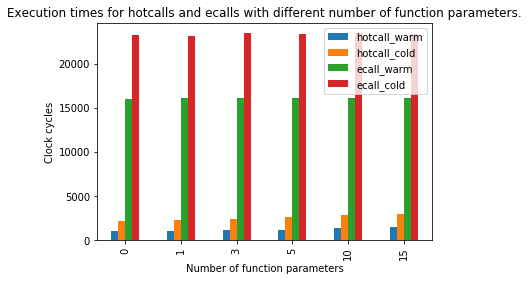

In [29]:
df_medians[['hotcall_warm', 'hotcall_cold', 'ecall_warm', 'ecall_cold']].plot.bar()
plt.xlabel("Number of function parameters")
plt.ylabel("Clock cycles")
plt.title("Execution times for hotcalls and ecalls with different number of function parameters.")

We can observe that the number of parameters does not make much difference in regards to the exection time of ecalls. It's more or less the same for 0 and 15 arguments (there is a very small difference but not significant). However, we can observe that adding parameters to hotcalls have a more significant impact.

Sending a parameter to a hotcall function involves the following steps:
1. Save the parameter in untrusted memory
2. Give the address of the parameter to the hotcall middle layer
3. 